### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\prasad\\practice\\My Working Projects\\Completed\\NLP\\Ham and Spam Email Classification using  Different types of Machine Learning Algorithms')

### Perform Imports and Load Data

In [3]:
df=pd.read_table('smsspamcollection.tsv',sep='\t')

In [4]:
df.head(2)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6


In [5]:
df.shape

(5572, 4)

In [6]:
len(df)

5572

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


### Visualize the data:

In [10]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

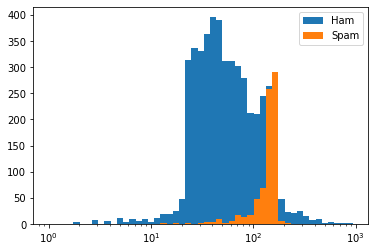

In [11]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,label='Ham')
plt.hist(df[df['label']=='spam']['length'],bins=bins,label='Spam')
plt.legend()
plt.show()

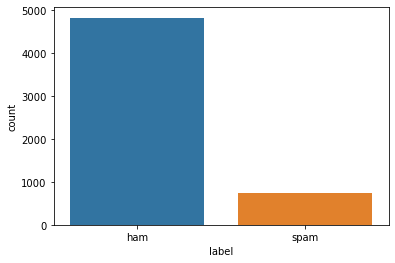

In [12]:
sns.countplot(df.label)
plt.show()

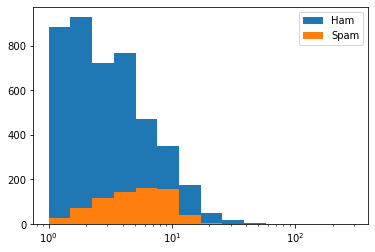

In [13]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,label='Ham')
plt.hist(df[df['label']=='spam']['punct'],bins=bins,label='Spam')
plt.legend()
plt.show()

### Create Feature and Label sets

In [14]:
X=df[['length','punct']]
X.head(2)

,length,punct
0,111,9
1,29,6


In [15]:
y=df['label']
y.head(2)

0    ham
1    ham
Name: label, dtype: object

### Data Split into Train,Test

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900, 2), (1672, 2), (3900,), (1672,))

### Model Building

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8427033492822966

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1404,   44],
       [ 219,    5]], dtype=int64)

#### Create Function For Model Evaluation

In [20]:
def check_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('\n','Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('\n','Classification Report:','\n')
    print(classification_report(y_test,y_pred))

#### Check Accuracy_score by using different algorithms

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC

In [22]:
# LogisticRegression
check_model(LogisticRegression(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8427033492822966

 Confusion Matrix:
[[1404   44]
 [ 219    5]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [23]:
# RandomForestClassifier
check_model(RandomForestClassifier(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.882177033492823

 Confusion Matrix:
[[1368   80]
 [ 117  107]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1448
        spam       0.57      0.48      0.52       224

    accuracy                           0.88      1672
   macro avg       0.75      0.71      0.73      1672
weighted avg       0.87      0.88      0.88      1672



In [24]:
# KNeighborsClassifier
check_model(KNeighborsClassifier(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8833732057416268

 Confusion Matrix:
[[1374   74]
 [ 121  103]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [25]:
# DecisionTreeClassifier
check_model(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8785885167464115

 Confusion Matrix:
[[1367   81]
 [ 122  102]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1448
        spam       0.56      0.46      0.50       224

    accuracy                           0.88      1672
   macro avg       0.74      0.70      0.72      1672
weighted avg       0.87      0.88      0.87      1672



In [26]:
# MultinomialNB
check_model(MultinomialNB(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8600478468899522

 Confusion Matrix:
[[1438   10]
 [ 224    0]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [27]:
# GaussianNB
check_model(GaussianNB(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8899521531100478

 Confusion Matrix:
[[1411   37]
 [ 147   77]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94      1448
        spam       0.68      0.34      0.46       224

    accuracy                           0.89      1672
   macro avg       0.79      0.66      0.70      1672
weighted avg       0.87      0.89      0.87      1672



In [28]:
# SVC
check_model(SVC(),X_train,X_test,y_train,y_test)

Accuracy Score:  0.8720095693779905

 Confusion Matrix:
[[1420   28]
 [ 186   38]]

 Classification Report: 

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672

